In [3]:
# Import needed packages and define rootpath
import os
import sys
import pandas as pd
import glob
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns

root_path = os.path.abspath(os.path.join('../..')) # <- adjust such that root_path always points at the root project dir (i.e. if current file is two folders deep, use '../..'). 
if root_path not in sys.path:
    sys.path.append(root_path)


In [4]:
# Get accuracy and log loss of bookmakers from evaluation/accuracy_bookmakers_df.csv
accuracy_bookmakers = pd.read_csv(os.path.join(root_path, "evaluation" , "accuracy_bookmakers_df.csv"))
accuracy_bookmakers_df = pd.DataFrame(accuracy_bookmakers)

# Get final accuracy and log loss for trad_ml models from sweep_results
pkl_files = glob.glob(os.path.join(root_path, "models", "trad_ml", "sweep_results", "*test.pkl"))
accuracy_trad_ml = []
for file in pkl_files:
    with open(file, 'rb') as f:
        obj = pkl.load(f)
        file_name = os.path.basename(file)  # Get only the file name from the path
        file_name_without_ext = os.path.splitext(file_name)[0]  # Remove the file extension
        shortened_file_name = file_name_without_ext[:-16]  # Remove the last 6 characters
        accuracy_trad_ml.append({
            'Bookmaker': shortened_file_name,
            'Accuracy': obj['metrics']['accuracy'],
            'Log Loss': obj['metrics']['lnloss'],
        })

accuracy_trad_ml_df = pd.DataFrame(accuracy_trad_ml)

accuracy_df = pd.concat([accuracy_trad_ml_df, accuracy_bookmakers_df], ignore_index=True)



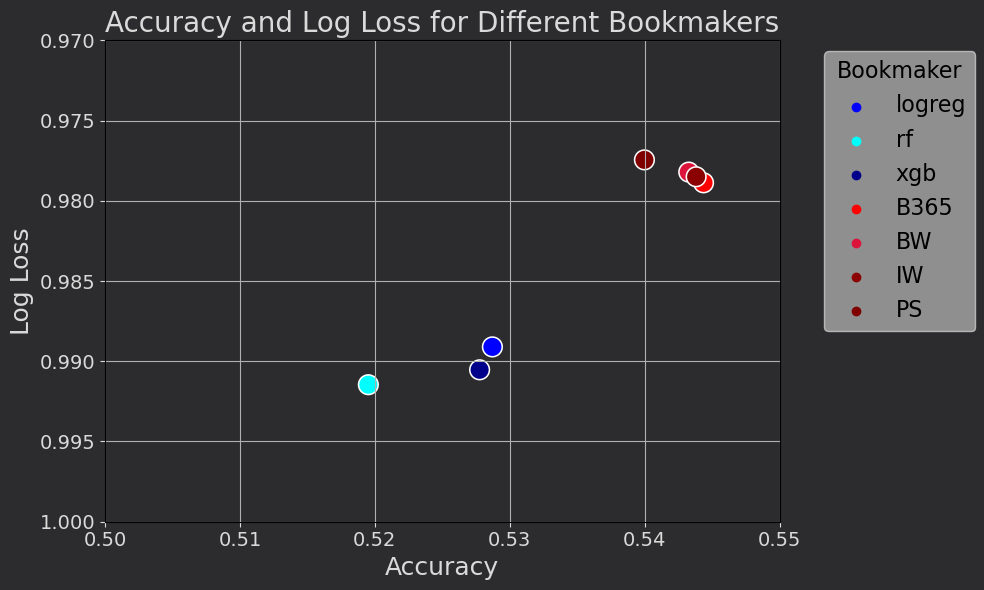

In [11]:
# Plot

# Define a custom color palette based on the Bookmaker names
bookmaker_colors = {
    'logreg': 'blue',
    'rf': 'aqua',
    'xgb': 'darkblue',
    'B365': 'red',
    'BW': 'crimson',
    'IW': 'darkred',
    'PS': 'maroon'
}

# Set the background color and text color
background_color = (44/255, 44/255, 46/255)  # Dark grey
text_color = (218/255, 218/255, 218/255)      # Light grey
legend_color = (169/255, 169/255, 169/255)    # Grey

# Set the style for the plot
plt.style.use('default')  # Reset to default style
plt.rcParams['figure.facecolor'] = background_color
plt.rcParams['text.color'] = text_color
plt.rcParams['axes.labelcolor'] = text_color
plt.rcParams['xtick.color'] = text_color
plt.rcParams['ytick.color'] = text_color

# Scatter plot with labeled data points
plt.figure(figsize=(10, 6))
sns.scatterplot(data=accuracy_df, x='Accuracy', y='Log Loss', hue='Bookmaker', palette=bookmaker_colors, s=200)

# Set axis labels and title
plt.xlabel('Accuracy', fontsize=18)
plt.ylabel('Log Loss', fontsize=18)
plt.title('Accuracy and Log Loss for Different Bookmakers', fontsize=20)

# Adjust legend position and set background color
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16, facecolor=legend_color, labelcolor = 'black')
legend.set_title('Bookmaker', prop={'size': 16})
legend.get_title().set_color('black')  # Set the title color manually
# Set x and y axis limits
plt.xlim(0.5, 0.55)   # Adjust these values according to your data
plt.ylim(0.97, 1)  # Adjust these values according to your data

# Reverse the y-axis to be descending (going upwards)
plt.gca().invert_yaxis()

plt.xticks(fontsize=14)  # Set the font size for x-axis tick labels
plt.yticks(fontsize=14)  # Set the font size for y-axis tick labels
plt.gca().set_facecolor(background_color)
plt.grid()
plt.tight_layout()

# Save the plot 
plt.savefig("accuracy_of_final_results.png", dpi=300, bbox_inches="tight")

plt.show()

